In [ ]:
"Hi this is a notebook"

In [57]:
# Install necessary libraries
import face_recognition
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
import requests
import os
from tqdm import tqdm
import tarfile
import random

In [47]:
# Load image
image_path = "humanface/usyk.jpeg"
image = face_recognition.load_image_file(image_path)

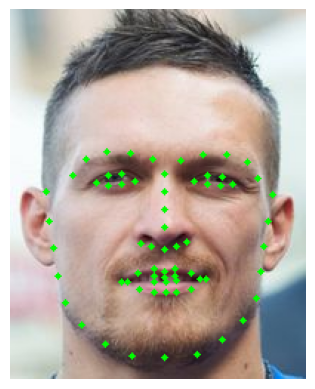

In [48]:

# Find the characteristic points of the face (human)
face_chars= face_recognition.face_landmarks(image)

# Plot image with charasterisitcs
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

# Make blank image to only show the face chars
height, width, _ = image.shape
blank = np.zeros((height, width, 3), dtype=np.uint8)

for face_char in face_chars:
    for feature, points in face_char.items():
        for point in points:
            cv2.circle(image, point, 2, (0, 255, 0), -1)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

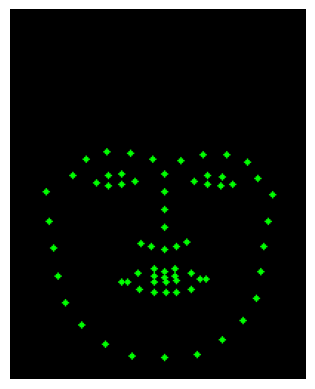

In [49]:
# Create a blank image to only show the face landmarks
blank = np.zeros((height, width, 3), dtype=np.uint8)

# Plot only the face landmark points on the blank image
for face_char in face_chars:
    for feature, points in face_char.items():
        for point in points:
            cv2.circle(blank, point, 2, (0, 255, 0), -1)

# Display the blank image with only the points
plt.imshow(cv2.cvtColor(blank, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [45]:
# Loading the dogs & installing the request module tqdm
!pip install requests tqdm


In [55]:
# Preparing dog breed data below
dataset_dir = 'stanford_dogs'
os.makedirs(dataset_dir, exist_ok=True)

images_url = 'http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar'
annotations_url = 'http://vision.stanford.edu/aditya86/ImageNetDogs/annotation.tar'

def download_file(url, dest_path):
    response = requests.get(url, stream=True)
    total_size = int(response.headers.get('content-length', 0))
    block_size = 1024 

    with open(dest_path, 'wb') as file, tqdm(
        desc=dest_path,
        total=total_size,
        unit='iB',
        unit_scale=True,
    ) as bar:
        for data in response.iter_content(block_size):
            file.write(data)
            bar.update(len(data))

# Download images and annotations
download_file(images_url, os.path.join(dataset_dir, 'images.tar'))
download_file(annotations_url, os.path.join(dataset_dir, 'annotations.tar'))


# Function to extract to tar file
def extract_tar(file_path, extract_to):
    with tarfile.open(file_path, 'r') as tar:
        tar.extractall(path=extract_to)

# Get images and annotations
extract_tar(os.path.join(dataset_dir, 'images.tar'), dataset_dir)
extract_tar(os.path.join(dataset_dir, 'annotations.tar'), dataset_dir)


# Check whats in the dataset directory
print("Dataset directory:", os.listdir(dataset_dir))


""" Optional: remove the tar files to save space after running it and learning !!!!!!!!! """
# os.remove(os.path.join(dataset_dir, 'images.tar'))
# os.remove(os.path.join(dataset_dir, 'annotations.tar'))

print("Dataset download and extraction complete.")

stanford_dogs/images.tar: 100%|██████████████| 794M/794M [22:51<00:00, 579kiB/s]
stanford_dogs/annotations.tar: 100%|██████| 21.9M/21.9M [00:20<00:00, 1.06MiB/s]


Dataset directory: ['Images', 'images.tar', 'Annotation', 'annotations.tar']
Dataset download and extraction complete.


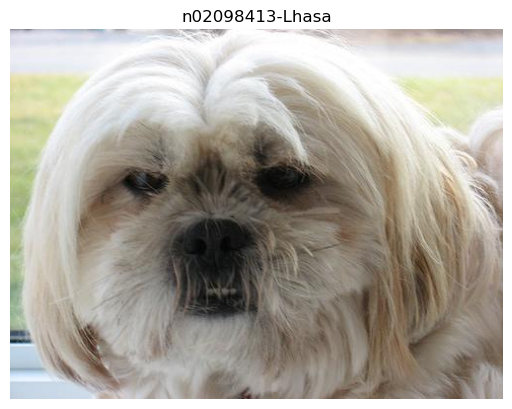

In [64]:
# Once downloaded run this cell to show a picture of a random dog breed
def show_random_dog_image(dataset_path):
    
    # Acceses the breed directories
    breed_dirs = os.listdir(dataset_path)
    
    # Choose a random breed directory
    random_breed = random.choice(breed_dirs)
    
    # Get the path to the directory
    breed_path = os.path.join(dataset_path, random_breed)
    
    # Variable that stores list of all the breed images in its directory
    breed_images = os.listdir(breed_path)
    
    # Chooses a random image from the breed directory
    random_image = random.choice(breed_images)
    
    # Load the image using OpenCV
    image_path = os.path.join(breed_path, random_image)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Go from BGR to RGB for normal coloration
    
    # Display the image with its label
    plt.imshow(image)
    plt.title(random_breed)
    plt.axis('off')
    plt.show()

# Set the path to the dataset that was downloaded above & show the random dog (breed)
dataset_path = 'stanford_dogs/Images'
show_random_dog_image(dataset_path)

In [62]:
# Okay so the problem we have is that we have to crop the faces of the dog to run the facial recognition on this will
# be solved below